# 1 Python

### 1
Чем отличаются типы list и tuple?

mutability

Какой из них можно использовать в качестве ключа в dict и добавлять в set?

tuple

Почему?

tuple is immutable

На какой структуре данных реализован dict в python?

hashmap/hashtable

Чем отличается range от xrange в Python2.x?

range это list, xrange - генератор

Что такое list comprehension?

способ генерации листов

Как работают функции map и reduce в Python?

map - преобразует список в другой список, заменяя каждое его значение на значение функции от этого значения

reduce - заменяет лист [a1, a2, a3, ...] на f(f(f(a1, a2), a3), ...)

### 2
Напишите рекурсивную функцию, возвращающую N-ное число Фи-
боначчи. Проверьте работу для небольших N. Выясните, для какого
N начинаются проблемы с глубиной рекурсии. Дополнительное зада-
ние для любознательных: попробуйте выяснить, можно ли в Python
изменить допустимую глубину рекурсии.

In [1]:
def fib(n):
    return fib(n - 1) + fib(n - 2) if n > 1 else n

In [2]:
for n in range(100):
    try:
        print(n, fib(n))
    except RecursionError as e:
        print(n, 'err')
        break

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817


KeyboardInterrupt: 

Cлишком долго идут вычисления, проблем с глубиной рекурсии пока нет.

Найдем глубину рекурсии:

In [3]:
i = [0]

In [4]:
def recf(i):
    i[0] += 1
    recf(i)

In [5]:
recf(i)

RecursionError: maximum recursion depth exceeded

In [6]:
i

[1974]

Глубина стека ~2000

Да, можно менять глубину рекурсии: sys.setrecursionlimit

In [7]:
from sys import getrecursionlimit, setrecursionlimit

In [9]:
getrecursionlimit()

2000

In [10]:
setrecursionlimit(3000)

In [11]:
i = [0]

In [12]:
def recf(i):
    i[0] += 1
    recf(i)

In [13]:
recf(i)

RecursionError: maximum recursion depth exceeded

In [14]:
i

[2974]

### 3
Попробуйте измерить время работы предыдущей функции при разных
N.

In [31]:
%timeit fib(5)
%timeit fib(10)
%timeit fib(15)
%timeit fib(20)
%timeit fib(25)
%timeit fib(30)
%timeit fib(35)
%timeit fib(40)

1.69 µs ± 8.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
20.1 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
224 µs ± 4.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.46 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27.2 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
300 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.39 s ± 69.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.5 s ± 452 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 4
Напишите функцию, возвращающую (через запятую) модуль и ар-
гумент комплексного числа по заданной мнимой и действительной
части. Возможно, вам потребуется импортировать какие-то тригоно-
метрические функции из модуля math. Приведите примеры работы.
Каков тип возвращаемого вашей функцией значения?

In [15]:
import cmath

In [16]:
def r_phi(re, im):
    c = complex(re, im)
    return abs(c),  cmath.phase(c)

In [17]:
print(r_phi(1, 0))
print(r_phi(0, 1))
print(r_phi(1, 1))

(1.0, 0.0)
(1.0, 1.5707963267948966)
(1.4142135623730951, 0.7853981633974483)


In [20]:
type(r_phi(0, 0))

tuple

### 5
Напишите docstrings к вашей последней функции. Изучите библиоте-
ку doctest и попробуйте проверить, что написанные в docstrings приме-
ры выполняются, без явного копирования кода оттуда (т.е. с помощью
doctest).

In [21]:
import doctest

In [22]:
def r_phi(re, im):
    """
    r_phi(re, im) -> (abs, phi)
    >>> r_phi(0, 0)
    (0.0, 0.0)
    >>> r_phi(1, 0)
    (1.0, 0.0)
    >>> r_phi(0, 1)
    (1.0, 1.5707963267948966)
    >>> r_phi(2, 0)
    (2.0, 0.0)
    """
    c = complex(re, im)
    return abs(c), cmath.phase(c)


doctest.testmod()

TestResults(failed=0, attempted=4)

### 6
Реализуйте класс комплексных чисел с самым базовым функциона-
лом. Цель не продемонстрировать умение спроектировать класс из
каждого второго домашнего задания по любому языку программиро-
вания, а посмотреть на особенности реализации классов на питоне.

In [23]:
class Complex(object):
    def __init__(self, re, im):
        self.re = re
        self.im = im
    
    def abs(self):
        return abs(complex(self.re, self.im))
    
    def __repr__(self):
        return 'Complex(re=%f, im=%f)' % (self.re, self.im)

In [24]:
Complex(1, 0)

Complex(re=1.000000, im=0.000000)

### 7
Изучите примеры работы с декораторами из официальной докумен-
тации. Фактически, декоратор - это функция, которая принимает на
вход другую функцию и возвращает еј в модифицированном виде.
Синтаксически предусмотрена возможность использовать декоратор,
написав перед объявлением функции имя_декоратора. Попробуйте
найти реализацию (или сделать сами) кэширующего декоратора и де-
коратора, вычисляющего время работы функции. Попробуйте приме-
нить эти декораторы в разной последовательности к функции, вычис-
ляющей числа Фибоначчи, сравнить и объяснить результаты. Объяс-
ните также, как работают использованные вами декораторы.

In [25]:
class Cache(dict):
    def __init__(self, f):
        self.f = f
    
    def __call__(self, *args, **kwargs):
        key = tuple(list(args) + ['|'] + list(kwargs.items()))
        if key not in self:
            self[key] = self.f(*args, **kwargs)
        return self[key]

In [26]:
@Cache
def fib(n):
    return fib(n - 1) + fib(n - 2) if n > 1 else n

In [27]:
fib(100)

354224848179261915075

In [28]:
from time import time

In [29]:
class Timer(object):
    def __init__(self, f):
        self.f = f
    
    def __call__(self, *args, **kwargs):
        start = time()
        res = self.f(*args, **kwargs)
        print(time() - start)
        return res

In [33]:
def fib(n):
    return fib(n - 1) + fib(n - 2) if n > 1 else n

@Timer
def tfib(n):
    return fib(n)

In [34]:
tfib(30)

0.3319997787475586


832040

In [36]:
tfib(35)

3.3339998722076416


9227465

In [37]:
@Cache
def fib(n):
    return fib(n - 1) + fib(n - 2) if n > 1 else n

@Timer
def tfib(n):
    return fib(n)

In [38]:
tfib(35)

0.003000020980834961


9227465

### 8
Выясните, чем отличается задание поля x через "self.x ="от объявле-
ния метода с декоратором property.

внутренней работой:

In [39]:
class Smth(object):
    def __init__(self):
        self.x1 = 'x1'
    
    @property
    def x2(self):
        return 'x2'

In [40]:
Smth.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'Smth' objects>,
              '__doc__': None,
              '__init__': <function __main__.Smth.__init__>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Smth' objects>,
              'x2': <property at 0x6f6c098>})

In [41]:
smth = Smth()
print(smth.__dict__)

{'x1': 'x1'}


In [42]:
print(smth.__dict__['x1'])
print(Smth.__dict__['x2'].__get__(smth))

x1
x2


### 9
Напишите setter и getter для полей класса комплексного числа.

In [43]:
class Complex(object):
    def __init__(self, re, im):
        self.__re = re
        self.__im = im
        
    @property
    def re(self):
        return self.__re
    
    @re.setter
    def re(self, value):
        self.__re = value
        
    @property
    def im(self):
        return self.__im
    
    @im.setter
    def im(self, value):
        self.__im = value
    
    def abs(self):
        return abs(complex(self.re, self.im))
    
    def __repr__(self):
        return 'Complex(re=%f, im=%f)' % (self.re, self.im)

In [44]:
c = Complex(1, 1)
print(c)
print(c.re, c.im)
c.re = c.im = 2
print(c)
print(c.re, c.im)

Complex(re=1.000000, im=1.000000)
1 1
Complex(re=2.000000, im=2.000000)
2 2


# 2 Requests/urllib + BeautifulSoup

Скачайте html-код страницы с новостью с любого новостного сайта и, рас-
парсив его с помощью библиотеки Beautiful Soup или любой другой анало-
гичной, получите текст статьи (без html-тегов или вкраплений java script).

In [45]:
import requests
from bs4 import BeautifulSoup

In [46]:
url = 'https://habrahabr.ru/post/329150/'

In [47]:
req = requests.get(url)

In [48]:
req.status_code

200

In [49]:
req.text[:100]

'<!DOCTYPE html>\n<html lang="ru" class="no-js">\n  <head>\n    <meta http-equiv="content-type" content='

In [50]:
bs = BeautifulSoup(req.text, 'html5lib')

In [51]:
bs.find(attrs={'class':'content html_format js-mediator-article'}).text[:1000]

'На текущий момент большинство крупных сообществ ВКонтакте уже имеют ботов, актуальность этой темы обуславливается огромным спросом на круглосуточную работу приложения, оповещение при вступлении в сообщество и выходе из него, рассылку информационных сообщений, именно бот сообщества ВКонтакте может решить эти задачи. В статье мы рассмотрим решение основных задач, которые часто возникают в любом крупном сообществе.\n\nНастройка Callback API для бота сообщества ВКонтакте\nПодготовка серверной части к подключению\nCallback API — это инструмент для отслеживания активности пользователей в Вашем сообществе ВКонтакте. С его помощью Вы можете реализовать новые полезные функции, например:\n\n\nБота для отправки мгновенных ответов на поступающие сообщения.\nСистему автоматической модерации контента.\nСервис для сбора и обработки показателей вовлеченности аудитории.\n\nЧтобы начать использовать Callback API, подключите свой сервер в настройках сообщества и выберите типы событий, данные о которых т

# 3 NumPy

In [52]:
import numpy as np

1.
Создайте numpy.ndarray размерностью 3x4x2 и продемонстрируйте разные способы обращения по индексам из документации NumPy.

In [53]:
t = np.random.random((3, 4, 2))

In [54]:
t

array([[[ 0.76404773,  0.65933762],
        [ 0.18679931,  0.64815088],
        [ 0.38640145,  0.2262329 ],
        [ 0.10864685,  0.23920533]],

       [[ 0.19599105,  0.42632099],
        [ 0.79644647,  0.03199365],
        [ 0.78758571,  0.92398299],
        [ 0.34633792,  0.07141844]],

       [[ 0.02024637,  0.6147015 ],
        [ 0.05823186,  0.37543987],
        [ 0.63095597,  0.07422669],
        [ 0.69752052,  0.67147855]]])

In [55]:
t[1, 2]

array([ 0.78758571,  0.92398299])

In [56]:
t[list(map(bool, [0, 1, 0]))]

array([[[ 0.19599105,  0.42632099],
        [ 0.79644647,  0.03199365],
        [ 0.78758571,  0.92398299],
        [ 0.34633792,  0.07141844]]])

In [57]:
t[:, 1, 1]

array([ 0.64815088,  0.03199365,  0.37543987])

In [58]:
t[1][2]

array([ 0.78758571,  0.92398299])

2.
Попробуйте сравнить по производительности numpy.array и list, выполняя какую-то стандартную операцию с каждым из типов много раз.

In [59]:
l = list(range(100))
npl = np.asarray(l)

In [60]:
print(list(map(lambda x: x ** 2, l))[:10])
print((npl ** 2)[:10])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[ 0  1  4  9 16 25 36 49 64 81]


In [61]:
%timeit list(map(lambda x: x ** 2, l))

32.6 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
%timeit npl ** 2

470 ns ± 5.24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


3.
Изучите numpy.linspace(), напишите свою реализацию аналогичной функции с помощью list comprehension, дающий тот же результат, только в виде list, а не numpy.ndarray. Сравните по производительности два варианта на достаточно больших массивах.

In [63]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [64]:
def my_linspace_list_comprehension(start, stop, num=50):
    l = (stop - start) / (num - 1)
    return list(start + l * i for i in range(num))

In [65]:
args = {'start': 0.0, 'stop': 1.0, 'num': 10000}
%timeit np.linspace(**args)
%timeit my_linspace_list_comprehension(**args)

21.4 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.6 ms ± 90.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [66]:
args = {'start': 0.0, 'stop': 1.0, 'num': 100000}
%timeit np.linspace(**args)
%timeit my_linspace_list_comprehension(**args)

127 µs ± 6.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14.8 ms ± 540 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 4 Matplotlib

1.
Что делает в Ipython Notebook команда %matplotlib inline?

Устанавливает бэкенд для отображения графиков непосредственно в ноутбуке

2.
Используя numpy.linspace и генераторы, постройте в matplotlib гра-
фик какой-нибудь элементарной функции. В минимальном варианте
вам потребуются только pyplot из matplotlib и методы pyplot.plot() и
pyplot.show(). Помните, что если импортируете модуль под каким-то
именем (например, plt), то обращаться надо уже к нему, а не к pyplot.

In [67]:
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline

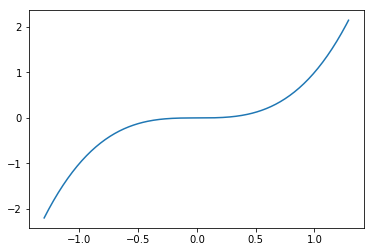

In [69]:
plt.plot(np.arange(-1.3, 1.3, 0.01), np.arange(-1.3, 1.3, 0.01) ** 3)
plt.show()

3.
Постройте графики еще нескольких элементарных функций (на том
же рисунке) и сделайте к ним подписи (легенду) с формулами (в под-
писях можно использовать LATEX, как обычно, в знаках $). Добавьте
какие-нибудь подписи к осям координат и название графика. Сохра-
ните изображение в файл одной строчкой на Python.

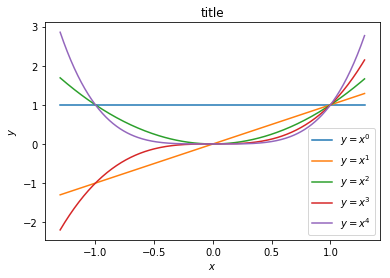

In [70]:
x = np.arange(-1.3, 1.3, 0.01)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('title')
for d in range(5):
    line, = plt.plot(x, x ** d)
#     line.set_label('$y_%d = x ^ %d$' % (d, d))
plt.legend(['$y = x ^ %d$' % d for d in range(5)], loc='lower right')
plt.savefig('img.png')
plt.show()

4.
Изучите документацию matplotlib и попробуйте построить на одном
изображении 4 системы координат, на верхних двух - квадратичную
и кубическую параболы, на нижних - экспоненту и логарифм.

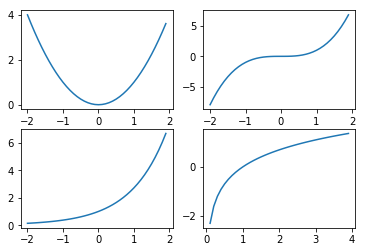

In [71]:
sp11 = plt.subplot(221)
sp11.plot(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1) ** 2)
sp12 = plt.subplot(222)
sp12.plot(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1) ** 3)
sp21 = plt.subplot(223)
sp21.plot(np.arange(-2, 2, 0.1), np.exp(np.arange(-2, 2, 0.1)))
sp22 = plt.subplot(224)
sp22.plot(np.arange(0.1, 4, 0.1), np.log(np.arange(0.1, 4, 0.1)))
plt.show()

5.
Изучите вопрос построения heatmap и изобразите его для функции
f(x; y) = 3xy + x - 2y в области [0; 5]^2.

In [72]:
def f(x, y):
    return 3 * x * y + x - 2 * y

In [81]:
x = np.arange(0, 5, 0.1)
y = np.arange(0, 5, 0.1)
z = f(*np.meshgrid(x, y))

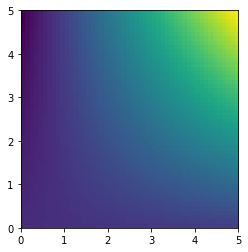

In [82]:
plt.imshow(z[::-1], extent=[0, 5, 0, 5])

6.
А теперь постройте трехмерный график той же функции в той же
области.

In [83]:
from mpl_toolkits.mplot3d import Axes3D

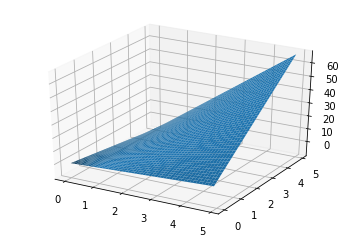

In [84]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_surface(*np.meshgrid(x, y), z)

# 5 Всё вместе + SciPy

Сгенерируйте точки (y; x) (500 будет достаточно), удовлетворяющие зави-
симости y = x^3 + 2x^2 - 3x + 2, затем, с помощью numpy.random добавьте к
координатам y нормальный шум. С помощью scipy восстановите исходную
зависимость, считая известной степень полинома. Вам поможет curvefit или
scipy.optimize.minimize, запущенный для суммы квадратичных отклонений.
У восстановленной зависимости найдите экстремумы численно. Покажите
на графике все вместе: исходные точки, восстановленную зависимость, най-
денные экстремумы.
Дополнительное задание: подберите коэффициенты многочлена, точно
проходящего через точки (без добавления нормального шума), составив и
решив с помощью scipy систему линейных уравнений.

In [93]:
import numpy as np
import scipy
import scipy.optimize

In [94]:
x = np.linspace(-10, 10, 500)

def fprot(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d
    
def f(x):
    return fprot(x, 1, 2, -3, 2)

f = np.vectorize(f)

y = f(x)

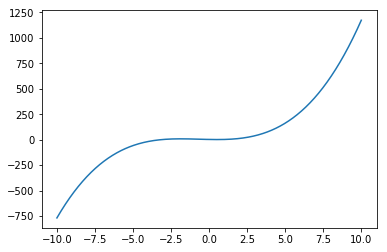

In [95]:
plt.plot(x, y)

In [96]:
y += np.random.randn(500) * 50

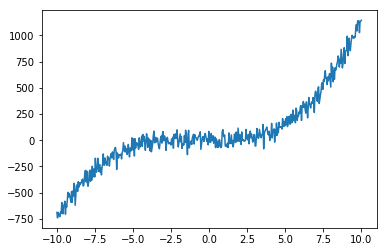

In [97]:
plt.plot(x, y)

In [98]:
tt = scipy.optimize.curve_fit(fprot, x, y)

In [99]:
params = tt[0]
params

array([ 0.97587629,  2.07113999, -2.36232173, -2.08913125])

In [100]:
def fpred(x):
    return fprot(x, *params)

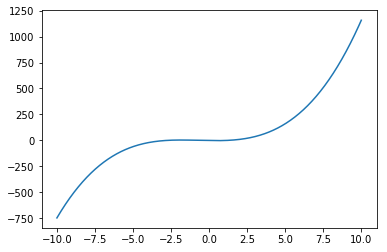

In [101]:
plt.plot(x, np.vectorize(fpred)(x))

In [103]:
def find_global_x_min(f, x0s, bounds):
    x_min = None
    for x0 in x0s:
        min_ = scipy.optimize.minimize(f, [x0], bounds=[bounds])
        if (x_min is None) or (f(min_.x) < f(x_min)):
            x_min = min_.x
    return x_min

In [104]:
x_min = find_global_x_min(fpred, np.arange(-9, 9, 5), [-10, 10])
x_min

array([-10.])

In [105]:
x_max = find_global_x_min(lambda x: -fpred(x), np.arange(-9, 9, 5), [-10, 10])
x_max

array([ 10.])

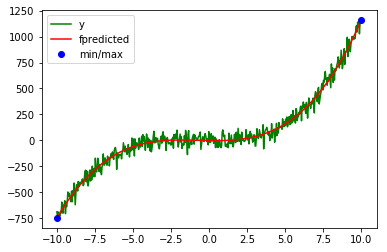

In [106]:
plt.plot(x, y, 'g')
plt.plot(x, np.vectorize(fpred)(x), 'r')
plt.plot([x_min, x_max], [fpred(x_min), fpred(x_max)], 'b.', markersize=12)
plt.legend(['y', 'fpredicted', 'min/max'])
plt.show()

# 6 Pandas + Scikit-learn

Считайте выборку из примера про детектирование кожи на фотографии с
семинара с помощью библиотеки pandas. Продемонстрируйте индексацию
по строкам и столбцам, labeled-based и index-based. Добавьте в DataFrame
столбцы, соответствующие попарным произведениям признаков и модулям
попарных разностей. Запустите на исходных признаках и на модифициро-
ванных KNeighboursClassifier, LogisticRegression и Random Forest из sklearn
и сравните качество работы каждого метода до и после преобразования
признаков.

In [107]:
import pandas as pd

In [108]:
data = pd.read_csv('Skin_NonSkin.txt', delimiter='\t')

In [109]:
data.head()

,74,85,123,1
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1
4,69,80,118,1


In [110]:
data['74'][:5]

0    73
1    72
2    70
3    70
4    69
Name: 74, dtype: int64

In [111]:
data.loc[0:2]

,74,85,123,1
0,73,84,122,1
1,72,83,121,1
2,70,81,119,1


In [112]:
data.iloc[1:4]

,74,85,123,1
1,72,83,121,1
2,70,81,119,1
3,70,81,119,1


In [113]:
cols = data.columns[:-1]
cols

Index(['74', '85', '123'], dtype='object')

In [114]:
for i in range(len(cols)):
    for j in range(i):
        data[cols[i] + 'x' + cols[j]] = data[cols[i]].values * data[cols[j]].values
        data[cols[i] + '-' + cols[j]] = np.abs(data[cols[i]].values - data[cols[j]].values)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
X_orig = data[cols].values
X_extended = data[data.columns[data.columns != '1']].values
y = data['1'].values

In [117]:
print(X_orig.shape)
print(X_extended.shape)
print(y.shape)

(245056, 3)
(245056, 9)
(245056,)


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_orig_tr, X_orig_ts, X_ext_tr, X_ext_ts, y_tr, y_ts = train_test_split(X_orig, X_extended, y, test_size=0.33, random_state=43)

In [120]:
from sklearn.metrics import accuracy_score, f1_score

In [121]:
res = []
for est_class in [LogisticRegression, KNeighborsClassifier, RandomForestClassifier]:
    for X_tr, X_ts, xsuf in [[X_orig_tr, X_orig_ts, 'orig'], [X_ext_tr, X_ext_ts, 'ext']]:
        est = est_class()
        est.fit(X_tr, y_tr)
        y_pred = est.predict(X_ts)
        res.append([est_class.__name__, xsuf, accuracy_score(y_ts, y_pred), f1_score(y_ts, y_pred)])

In [122]:
pd.DataFrame(res, columns=['est', 'xsuf', 'accuracy_score', 'f1_score'])

,est,xsuf,accuracy_score,f1_score
0,LogisticRegression,orig,0.919116,0.809561
1,LogisticRegression,ext,0.990973,0.978796
2,KNeighborsClassifier,orig,0.999530,0.998874
3,KNeighborsClassifier,ext,0.999295,0.998312
4,RandomForestClassifier,orig,0.999233,0.998163
5,RandomForestClassifier,ext,0.999641,0.999140


# 7 Bokeh

Выполните упражнения из tutorial: http://bokeh.pydata.org/en/latest/tutorial/index.html
Есть три секции с упражнениями (от базовых до продвинутых), каждая
будет оцениваться на столько же баллов, что и задание на scipy.

Показывается ошибка 404: content not found

In [123]:
import requests

In [124]:
req = requests.get('http://bokeh.pydata.org/en/latest/tutorial/index.html')

In [125]:
req.status_code

404